# Model Evaluation from Scratch

### Goal
Evaluate machine learning models **without external libraries**, using only:
- train–test split
- confusion matrix
- accuracy, precision, recall, F1 score

This notebook focuses on **understanding model failure**, not just computing numbers.


## Why Model Evaluation Matters

Training loss tells us how well a model fits seen data.
Evaluation metrics tell us whether the model **generalizes**.

A good evaluation answers:
- What kind of mistakes does the model make?
- Are those mistakes acceptable for the problem?


In [1]:
import numpy as np

## Train–Test Split (From Scratch)

We split data to evaluate performance on **unseen samples**.

Key assumptions:
- Train and test data come from the same distribution
- Samples are independent

Violations lead to misleading evaluation.


In [2]:
def train_test_split(X, y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split], indices[split:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]


## Confusion Matrix

For binary classification, every prediction falls into one of four categories:
- True Positive (TP)
- False Positive (FP)
- False Negative (FN)
- True Negative (TN)

All evaluation metrics are derived from these counts.


In [3]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    
    return TP, FP, FN, TN


## Accuracy

Accuracy measures the fraction of correct predictions.

Limitation:
- Fails on imbalanced datasets
- Does not distinguish between error types


In [4]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


## Precision

Precision answers:
> When the model predicts **positive**, how often is it correct?

Precision punishes **false positives**.
High precision means fewer false alarms.


In [5]:
def precision_score(y_true, y_pred):
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FP + 1e-8)


## Recall

Recall answers:
> Out of all actual positives, how many did the model detect?

Recall punishes **false negatives**.
High recall means fewer missed cases.


In [6]:
def recall_score(y_true, y_pred):
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred)
    return TP / (TP + FN + 1e-8)


## F1 Score

F1 score balances precision and recall using the harmonic mean.

It is high **only if both precision and recall are high**.
Useful when:
- Classes are imbalanced
- Both FP and FN matter


In [7]:
def f1_score(y_true, y_pred):
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    return 2 * p * r / (p + r + 1e-8)


## Evaluation Pipeline

We now evaluate trained models using:
- Accuracy
- Precision
- Recall
- F1 score

All metrics are derived from the confusion matrix.


In [8]:
def evaluate_model(y_true, y_pred):
    TP, FP, FN, TN = confusion_matrix(y_true, y_pred)

    print("Confusion Matrix:")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}\n")

    print("Metrics:")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))


## Example: Evaluating a Binary Classifier from Scratch

To understand evaluation, we construct a **simple synthetic example**.

We will:
- Create binary labels manually
- Simulate model predictions
- Evaluate using our own metrics


In [9]:
# Ground truth labels (1 = positive, 0 = negative)
y_true = np.array([
    1, 1, 1, 1, 1,      # positives
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0  # negatives
])


### Simulated Model Predictions

We simulate a conservative classifier:
- It avoids false positives
- But misses some positives


In [11]:
# Simulated predictions
y_pred = np.array([
    1, 0, 1, 0, 0,      # misses some positives
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0
])


## Model Evaluation Results


In [13]:
evaluate_model(y_true, y_pred)


Confusion Matrix:
TP: 2, FP: 0, FN: 3, TN: 10

Metrics:
Accuracy : 0.8
Precision: 0.999999995
Recall   : 0.3999999992
F1 Score : 0.5714285657142857


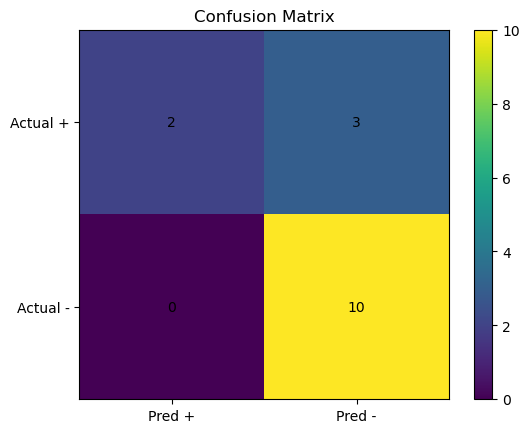

In [14]:
import matplotlib.pyplot as plt

TP, FP, FN, TN = confusion_matrix(y_true, y_pred)

matrix = np.array([[TP, FN],
                   [FP, TN]])

plt.imshow(matrix)
plt.xticks([0, 1], ["Pred +", "Pred -"])
plt.yticks([0, 1], ["Actual +", "Actual -"])
plt.title("Confusion Matrix")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, matrix[i, j], ha="center", va="center")

plt.show()


## Visualizing the Decision Threshold

Logistic regression outputs probabilities.

A prediction becomes:
- Positive if probability ≥ threshold
- Negative otherwise

Changing the threshold changes:
- False positives
- False negatives
- Precision and recall


In [15]:
# Simulated model probabilities (output of sigmoid)
y_probs = np.array([
    0.92, 0.65, 0.58, 0.40, 0.30,
    0.25, 0.20, 0.15, 0.10, 0.05,
    0.03, 0.02, 0.01, 0.01, 0.005
])

# Ground truth (same as before)
y_true = np.array([
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0
])


In [16]:
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

evaluate_model(y_true, y_pred)


Confusion Matrix:
TP: 3, FP: 0, FN: 2, TN: 10

Metrics:
Accuracy : 0.8666666666666667
Precision: 0.9999999966666667
Recall   : 0.5999999988
F1 Score : 0.7499999934375


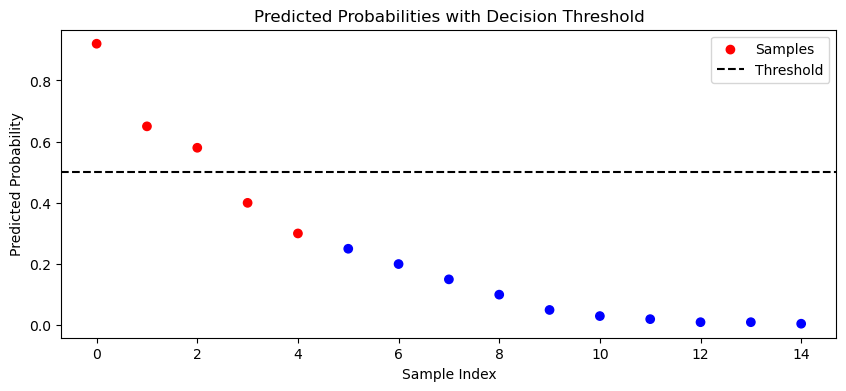

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.scatter(range(len(y_probs)), y_probs, c=y_true, cmap="bwr", label="Samples")
plt.axhline(y=threshold, color="black", linestyle="--", label="Threshold")

plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.title("Predicted Probabilities with Decision Threshold")
plt.legend()
plt.show()


## Final Takeaways

- Training performance ≠ generalization
- Evaluation must use unseen data
- Confusion matrix explains *how* a model fails
- Accuracy can mislead on imbalanced data
- Precision penalizes false positives
- Recall penalizes false negatives
- Threshold controls the precision–recall trade-off
- F1 enforces balance when both errors matter

> **Models don’t fail silently — metrics tell you how they fail.**

Day 7 completes **model evaluation from scratch** and concludes  
**Week B — ML from Scratch (NumPy only)**.
